In [576]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as date
from matplotlib import rcParams
import datetime

In [577]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [578]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import update

In [579]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [580]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)

In [581]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [582]:
# Save references to each table
Station = base.classes.station
Measurement = base.classes.measurement

In [583]:
# Preview of the Station table
station_res = engine.execute("select * from station")
station_df = pd.read_sql_table("station", "sqlite:///Resources/hawaii.sqlite", index_col="id")

station_df.head(5).style

,station,name,latitude,longitude,elevation
id,,,,,
1,USC00519397,"WAIKIKI 717.2, HI US",21.271600,-157.816800,3.000000
2,USC00513117,"KANEOHE 838.1, HI US",21.423400,-157.801500,14.600000
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.521300,-157.837400,7.000000
4,USC00517948,"PEARL CITY, HI US",21.393400,-157.975100,11.900000
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.499200,-158.011100,306.600000


In [584]:
station_res.close()

In [585]:
# Preview of the Measurement table
measure_res = engine.execute("select * from measurement")
measure_df = pd.read_sql_table("measurement", "sqlite:///Resources/hawaii.sqlite", index_col="id")

measure_df.head(5).style

,station,date,prcp,tobs
id,,,,
1,USC00519397,2010-01-01,0.080000,65.000000
2,USC00519397,2010-01-02,0.000000,63.000000
3,USC00519397,2010-01-03,0.000000,74.000000
4,USC00519397,2010-01-04,0.000000,76.000000
5,USC00519397,2010-01-06,nan,73.000000


In [586]:
measure_res.close()

In [587]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [588]:
# Find the most recent date in the data set.
dates = session.query(Measurement.date)
dates_asc = dates.order_by(Measurement.date)
first_date = dates_asc.first().date

first_date

'2010-01-01'

#### Design a query to retrieve the last 12 months of precipitation data and plot the results. 


In [589]:
# Starting from the most recent data point in the database. 
dates_des = dates.order_by(Measurement.date.desc())
last_date = dates_des.first().date
last_date_dt = dt.datetime.strptime(last_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
prev_year = last_date.replace("2017", "2016")
prev_year_dt = dt.datetime.strptime(prev_year, "%Y-%m-%d")

print(last_date_dt)
print(prev_year_dt)

2017-08-23 00:00:00
2016-08-23 00:00:00


In [590]:
# Perform a query to retrieve the data and precipitation scores from the last 12 months
p_scores = session.query(Measurement.date, func.round(func.avg(Measurement.prcp),4)).\
    filter(Measurement.date >= prev_year_dt - dt.timedelta(days=1)).\
    order_by(Measurement.date).\
    group_by(Measurement.date).all()

print(f"{p_scores[0:4]} ... [{p_scores[-1]}]")

[('2016-08-23', 0.4517), ('2016-08-24', 1.555), ('2016-08-25', 0.0771), ('2016-08-26', 0.0167)] ... [('2017-08-23', 0.1325)]


In [591]:
# Save the query results as a Pandas DataFrame and set the index to the date column
p_df = pd.DataFrame(p_scores,columns = ["Date", "Precipitation"])
p_df.set_index("Date",inplace=True)

# Sort the dataframe by date
p_df.sort_values("Date")
p_df.head(5).style


,Precipitation
Date,
2016-08-23,0.451700
2016-08-24,1.555000
2016-08-25,0.077100
2016-08-26,0.016700
2016-08-27,0.064000


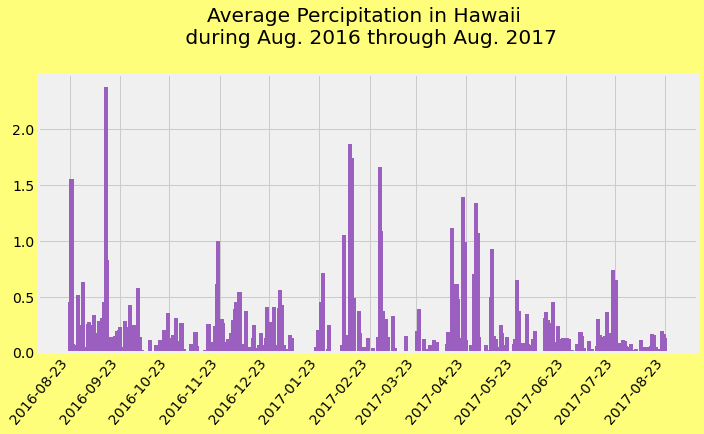

In [592]:
# Use Pandas Plotting with Matplotlib to plot the data
noidx_dt = p_df.index.values
plt_df = pd.DataFrame({'Dates': noidx_dt, 'Precipitation': p_df['Precipitation']})
plt_df['Dates'] = pd.to_datetime(plt_df['Dates'])

months =[]
for x in plt_df['Dates']:
    if x.day == 23:
            months.append(f'{x.date()}')

ax = plt_df.plot.bar(x = 'Dates',y= 'Precipitation',title="Average Percipitation in Hawaii \n during Aug. 2016 through Aug. 2017",legend=False,color="xkcd:amethyst",use_index=False,xlim=(plt_df['Dates'].iloc[0],plt_df['Dates'].iloc[-1]),width=2.5,figsize=(10,7))
ax.set_xticks([plt_df.index.get_loc(m) for m in months])
ax.xaxis.set_ticklabels(months)
ax.figure.set_facecolor(color='xkcd:light yellow')
ax.figure.tight_layout()
ax.autoscale(tight=False)
plt.subplots_adjust(top=.75) 
for label in ax.get_xticklabels():
        label.set_rotation(50)
        label.set_horizontalalignment('right')

In [593]:
plt.close('all')

In [594]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [595]:
# Design a query to calculate the total number stations in the dataset


In [596]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [597]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [598]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [599]:
# Close Session
session.close()